In [2]:
from pathlib import Path
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


loc = Path("/Users/brianpm/Dropbox/Data/ersst")
fils = sorted(loc.glob("*.nc"))

dses = [xr.open_dataset(f) for f in fils]

In [3]:
ds = xr.concat(dses, dim='time')

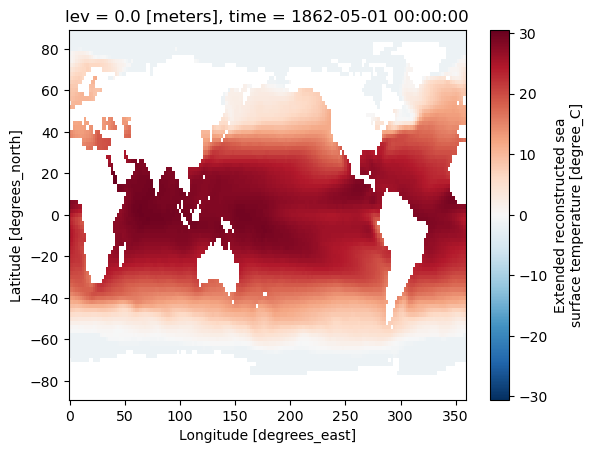

In [4]:
ds.isel(time=100).squeeze()['sst'].plot.pcolormesh()

In [5]:
ds

<xarray.Dataset> Size: 263MB
Dimensions:  (time: 2053, lev: 1, lat: 89, lon: 180)
Coordinates:
  * lat      (lat) float64 712B -88.0 -86.0 -84.0 -82.0 ... 82.0 84.0 86.0 88.0
  * lev      (lev) float64 8B 0.0
  * lon      (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) object 16kB 1854-01-01 00:00:00 ... 2025-01-15
Data variables:
    sst      (time, lev, lat, lon) float32 132MB nan nan nan ... -1.8 -1.8 -1.8
    ssta     (time, lev, lat, lon) float32 132MB nan nan ... -4.768e-07
Attributes: (12/38)
    Conventions:                CF-1.6, ACDD-1.3
    metadata_link:              https://doi.org/10.7289/V5T72FNM
    id:                         ersst.v5.185401
    naming_authority:           gov.noaa.ncei
    title:                      NOAA ERSSTv5 (in situ only)
    summary:                    ERSST.v5 is developped based on v4 after revi...
    ...                         ...
    platform:                   Ship and Buoy SSTs from ICOADS R3.0 and NCEP GTS
    instrument:                 Conventional thermometers
    source:                     In situ data: ICOADS R3.0 before 2015, NCEP i...
    comment:                    SSTs were observed by conventional thermomete...
    references:                 Huang et al, 2017: Extended Reconstructed Sea...
    climatology:                Climatology is based on 1971-2000 SST, Xue, Y...

In [8]:
global_mean = ds['sst'].weighted(np.cos(np.radians(ds.lat))).mean(dim=("lat","lon")).squeeze()

In [19]:
# global_mean.time
import cftime
import pandas as pd


# Extract the mixed time values
mixed_times = ds['time'].values  # Replace 'time' with your actual time coordinate name

# Convert all mixed time values to pandas Timestamps
converted_times = []
for time in mixed_times:
    if isinstance(time, cftime.Datetime360Day):
        # Convert cftime to pandas Timestamp
        converted_date = pd.Timestamp(time)
    else:
        # Assume it's already a pandas Timestamp
        converted_date = time
    converted_times.append(converted_date)

# Now, convert the list to a pandas DatetimeIndex
new_time_index = pd.DatetimeIndex(converted_times)

# Update the dataset's time coordinate
ds['time'] = new_time_index

# If you want to ensure the new time dimension is of type "datetime64[ns]"
ds['time'] = ds['time'].astype('datetime64[ns]')

# Now `ds['time']` should have a consistent time format throughout
print(ds)

TypeError: Cannot convert input [1854-01-01 00:00:00] of type <class 'cftime._cftime.Datetime360Day'> to Timestamp